# Methods to Findout Upper Bound  and Lower Bound of HSV Colors in Image

##  1.SHOWS HSV VALUE IN THE IMAGES


In [2]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('um.jpg')

# Mouse callback function
def show_hsv_value(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:  # when mouse moves
        pixel = image[y, x]
        h,s,v = cv2.cvtColor(np.uint8([[pixel]]), cv2.COLOR_BGR2HSV)[0][0]

        print(f"Position ({x},{y}) -> HSV: ({h}, {s}, {v})")

# Create window and set callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', show_hsv_value)

# Display the image
while True:

    cv2.namedWindow('Image')
    cv2.imshow('Image', image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    

cv2.destroyAllWindows()


Position (10,258) -> HSV: (17, 99, 177)
Position (31,242) -> HSV: (54, 170, 171)
Position (47,229) -> HSV: (18, 255, 180)
Position (62,217) -> HSV: (157, 222, 214)
Position (73,209) -> HSV: (102, 101, 249)
Position (82,203) -> HSV: (54, 151, 192)
Position (88,195) -> HSV: (60, 108, 205)
Position (94,187) -> HSV: (50, 186, 195)
Position (103,176) -> HSV: (101, 97, 255)
Position (110,164) -> HSV: (102, 255, 193)
Position (117,154) -> HSV: (17, 255, 250)
Position (121,143) -> HSV: (95, 52, 255)
Position (126,135) -> HSV: (102, 255, 213)
Position (128,127) -> HSV: (102, 255, 207)
Position (131,120) -> HSV: (103, 249, 225)
Position (134,114) -> HSV: (100, 255, 228)
Position (135,109) -> HSV: (103, 229, 198)
Position (136,104) -> HSV: (110, 56, 245)
Position (137,99) -> HSV: (148, 49, 214)
Position (137,97) -> HSV: (148, 50, 210)
Position (137,94) -> HSV: (146, 48, 214)
Position (137,93) -> HSV: (146, 47, 215)
Position (137,92) -> HSV: (147, 48, 216)
Position (137,91) -> HSV: (147, 48, 218)


Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation


## 2.Finding Upper and Lower Threshold value using tracker

In [ ]:
import cv2 as cv
import numpy as np
 
def nothing(x):
    pass
 
img = cv.imread('um.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
 
cv.namedWindow("Trackbars")
 
cv.createTrackbar("LH", "Trackbars", 0, 179,nothing)
cv.createTrackbar("LS", "Trackbars", 0, 255, nothing)
cv.createTrackbar("LV", "Trackbars", 0, 255, nothing)
cv.createTrackbar("UH", "Trackbars", 179, 179, nothing)
cv.createTrackbar("US", "Trackbars", 255, 255, nothing)
cv.createTrackbar("UV", "Trackbars", 255, 255, nothing)
 
while True:
    lh = cv.getTrackbarPos("LH", "Trackbars")
    ls = cv.getTrackbarPos("LS", "Trackbars")
    lv = cv.getTrackbarPos("LV", "Trackbars")
    uh = cv.getTrackbarPos("UH", "Trackbars")
    us = cv.getTrackbarPos("US", "Trackbars")
    uv = cv.getTrackbarPos("UV", "Trackbars")
 
    lower = np.array([lh, ls, lv])
    upper = np.array([uh, us, uv])
 
    mask = cv.inRange(hsv, lower, upper)
    result = cv.bitwise_and(img, img, mask=mask)
 
    cv.imshow("Mask", mask)
    cv.imshow("Result", result)
 
    if cv.waitKey(1) & 0xFF == ord('q'):  
        break
 
cv.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/user/miniconda3/lib/python3.13/site-packages/cv2/qt/plugins"


## 3.Using Histogram(Only finding Peak Color UB,LB )


[1.01217708e+05 1.09538440e+02 8.03867303e-01]
Gaussian Fit: mu=109.54, sigma=0.80
Lower Bound: 107, Upper Bound: 111


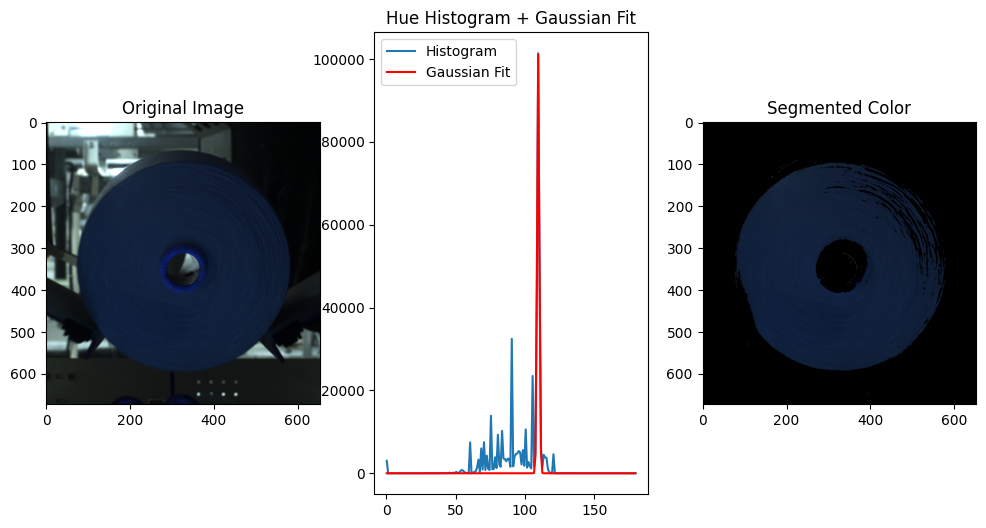

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian function
def gaussian(x, a, mu, sigma):
    return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 1. Load image
img = cv2.imread('color_cropped.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Convert to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# 3. Compute Hue histogram
hue_channel = img_hsv[:, :, 0]
hist, bins = np.histogram(hue_channel.ravel(), bins=180, range=[0, 180])

# 4. Fit Gaussian to histogram
x = (bins[:-1] + bins[1:]) / 2 
hist = hist.ravel()

p0 = [np.max(hist), x[np.argmax(hist)], 20]
popt, _ = curve_fit(gaussian, x, hist, p0=p0)

print(popt)


a, mu, sigma = popt
lower_bound = int(max(0, mu - 2 * sigma))
upper_bound = int(min(179, mu + 2 * sigma))

print(f"Gaussian Fit: mu={mu:.2f}, sigma={sigma:.2f}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# 5. Create mask using bounds
lower = np.array([lower_bound, 50, 50])
upper = np.array([upper_bound, 255, 255])
mask = cv2.inRange(img_hsv, lower, upper)
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)



# 6. Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img_rgb)

plt.subplot(1, 3, 2)
plt.title("Hue Histogram + Gaussian Fit")
plt.plot(x, hist, label='Histogram')
plt.plot(x, gaussian(x, *popt), 'r-', label='Gaussian Fit')
plt.legend()

plt.subplot(1, 3, 3)
plt.title("Segmented Color")
plt.imshow(result)
plt.show()

# CROSS CHECKING

 

### 1.Create HSV Image

In [5]:
import numpy as np
import cv2

# Define image size
height, width = 1000, 1000

# Define HSV color 
hsv_color = (90,255,255)# OpenCV uses H: 0-179, S: 0-255, V: 0-255
# Create an HSV image
hsv_image = np.full((height, width, 3), hsv_color, dtype=np.uint8)

# Convert HSV to BGR for display or saving
bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Save the image
cv2.imwrite(f"{hsv_color[0]},{hsv_color[1]},{hsv_color[2]}.png", bgr_image)


True

### 2.Extracting colors from Image using upper bound and lower bound

In [ ]:
import cv2
import numpy as np

frame = cv2.imread('balloon.jpg')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Define blue range
lower_blue = np.array([135,50,210])
upper_blue = np.array([ 157, 255, 255,])

mask = cv2.inRange(hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(frame, frame, mask=mask)

cv2.imshow('Frame', frame)
cv2.imshow('Mask', mask)
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 3.Histogram Visualization

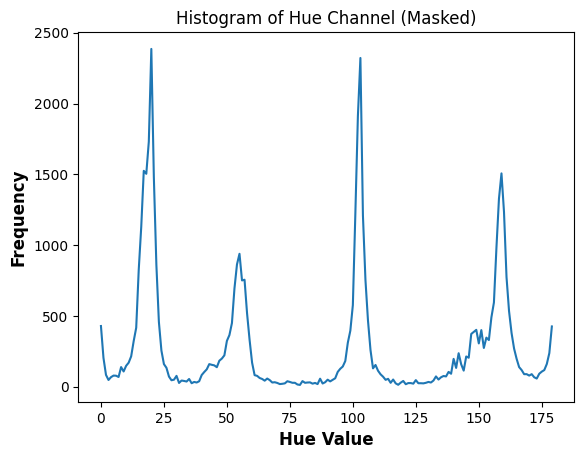

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread('um.jpg')
copy = image.copy()

hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)


hist_mask = cv2.calcHist([hsv], [0], None, [180], [0,180])


plt.plot(hist_mask)
plt.title('Histogram of Hue Channel (Masked)')
plt.xlabel('Hue Value', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()




# Detect multiple color in Image  - Working 50-50


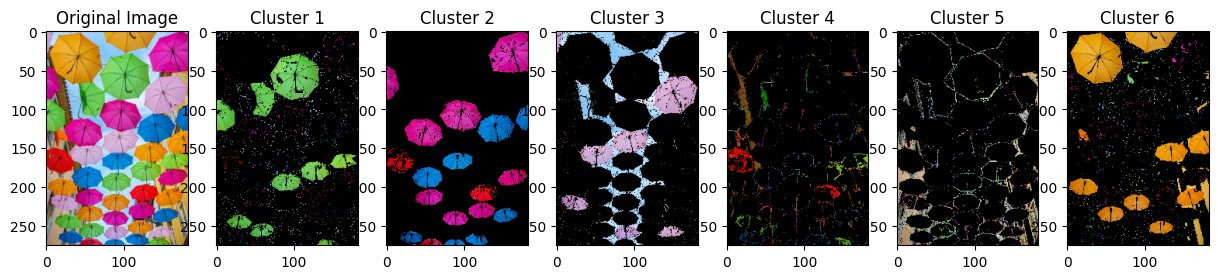

Cluster 1: Lower=[ 45 101 162], Upper=[ 62 202 225]
Cluster 2: Lower=[ 86 192 165], Upper=[179 255 244]
Cluster 3: Lower=[ 77  21 185], Upper=[172 117 255]
Cluster 4: Lower=[  0 129  48], Upper=[159 255 242]
Cluster 5: Lower=[ 0  0 85], Upper=[153 154 253]
Cluster 6: Lower=[ 14 175 184], Upper=[ 23 255 251]


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 1. Load image
img = cv2.imread('um.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Convert to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3. Prepare data for GMM
pixels = img_hsv.reshape(-1, 3)  # Flatten to (num_pixels, 3)

# 4. Fit Gaussian Mixture Model
n_colors = 6 # Change this based on how many colors you expect
gmm = GaussianMixture(n_components=n_colors, covariance_type='full', random_state=42)
gmm.fit(pixels)

# 5. Predict cluster for each pixel
labels = gmm.predict(pixels)
segmented = labels.reshape(img_hsv.shape[:2])

# 6. Create masks for each color cluster
plt.figure(figsize=(15, 5))
plt.subplot(1, n_colors+1, 1)
plt.title("Original Image")
plt.imshow(img_rgb)

for i in range(n_colors):
    mask = (segmented == i).astype(np.uint8) * 255
    color_segment = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
    plt.subplot(1, n_colors+1, i+2)
    plt.title(f"Cluster {i+1}")
    plt.imshow(color_segment)

plt.show()

# Optional: Get HSV ranges for each cluster
means = gmm.means_
covariances = gmm.covariances_
for i in range(n_colors):
    mu = means[i]
    sigma = np.sqrt(np.diag(covariances[i]))
    lower_bound = np.clip(mu - 2*sigma, [0,0,0], [179,255,255]).astype(int)
    upper_bound = np.clip(mu + 2*sigma, [0,0,0], [179,255,255]).astype(int)
    print(f"Cluster {i+1}: Lower={lower_bound}, Upper={upper_bound}")
